In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from time import time
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
%matplotlib inline
set_matplotlib_formats('svg')
!python --version

Python 3.9.2


In [2]:
data = sns.load_dataset('penguins')
data = data.dropna()
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

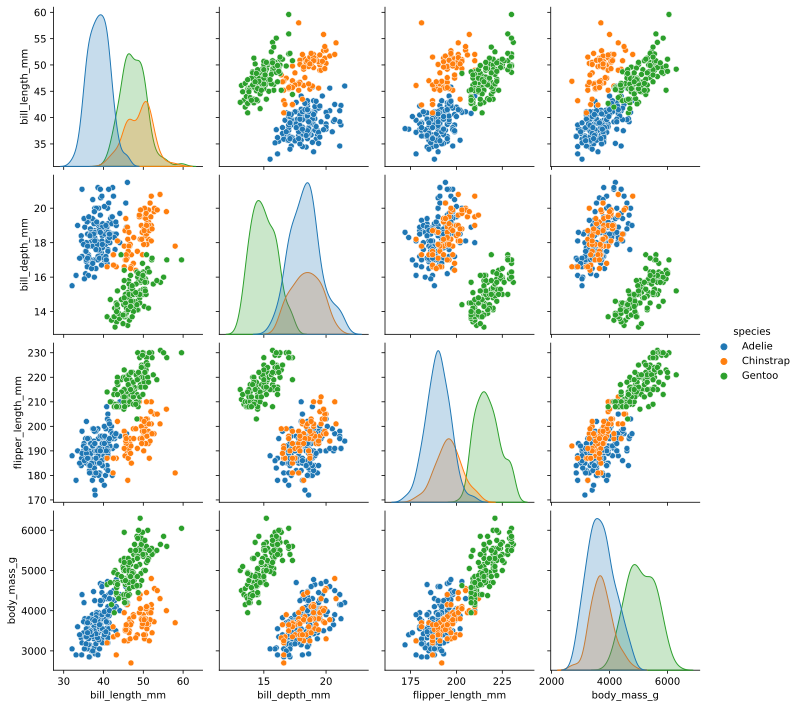

In [4]:
sns.pairplot(data=data, hue='species')

In [46]:
clf = SGDClassifier(max_iter=1000, tol=1e-3, loss='log', alpha=0.0,
                    learning_rate='constant', eta0=0.001)
X = data[['bill_length_mm', 'bill_depth_mm']].values
y, labels = pd.factorize(data['species'])
Y = np.expand_dims(y, axis=1)
clf.fit(X, y)
clf.coef_, clf.intercept_

(array([[-0.62773133,  1.59067415],
        [ 0.03087543, -0.12644908],
        [ 0.53092672, -1.51758008]]),
 array([ 0.08721969, -0.0742539 ,  0.01730307]))

In [37]:
clf.predict_proba([[2,32]])

array([[1., 0., 0.]])

<AxesSubplot:>

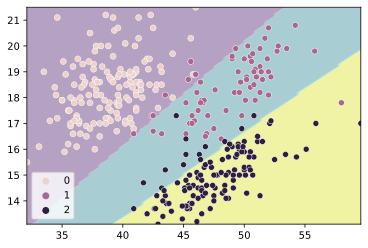

In [50]:
clf.fit(X, y)

def decision_boundary(X, clf):
    xaxis = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    yaxis = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    xx, yy = np.meshgrid(xaxis, yaxis)
    zz = np.apply_along_axis(clf, 2, np.dstack([xx, yy]))
    plt.contourf(xx, yy, zz, alpha=0.4)
decision_boundary(X, lambda x: clf.predict([x]).item())
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y[:, 0])